In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')
from keras.layers import Dense, PReLU, Dropout, BatchNormalization,Conv2D

Using TensorFlow backend.


In [2]:
test  = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

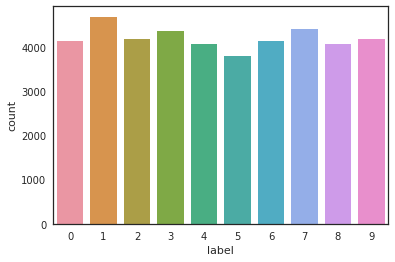

In [3]:
Y_train = train["label"]

# Remove 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [4]:
# Check the missing data (only pixels)
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [7]:
X_train.shape

(42000, 784)

In [8]:
# Labels are 10 digits numbers from 0 to 9. Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [9]:
#Split training and valdiation set
#  first, Set the random seed
random_seed = 2

In [10]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [11]:
model = Sequential()
model.add(Dense(784, input_dim=784, kernel_initializer='normal'))
model.add(PReLU())
model.add(Dense(400, activation = 'relu'))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(300, activation = 'relu'))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(200, activation = 'relu'))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=200, verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 6s - loss: 0.5937 - acc: 0.8076 - val_loss: 0.1854 - val_acc: 0.9479
Epoch 2/10
 - 3s - loss: 0.1677 - acc: 0.9553 - val_loss: 0.1300 - val_acc: 0.9648
Epoch 3/10
 - 3s - loss: 0.1111 - acc: 0.9719 - val_loss: 0.1679 - val_acc: 0.9583
Epoch 4/10
 - 3s - loss: 0.0890 - acc: 0.9765 - val_loss: 0.1085 - val_acc: 0.9717
Epoch 5/10
 - 3s - loss: 0.0616 - acc: 0.9837 - val_loss: 0.1128 - val_acc: 0.9743
Epoch 6/10
 - 3s - loss: 0.0574 - acc: 0.9843 - val_loss: 0.1004 - val_acc: 0.9767
Epoch 7/10
 - 3s - loss: 0.0450 - acc: 0.9881 - val_loss: 0.1026 - val_acc: 0.9745
Epoch 8/10
 - 3s - loss: 0.0415 - acc: 0.9885 - val_loss: 0.0986 - val_acc: 0.9807
Epoch 9/10
 - 3s - loss: 0.0310 - acc: 0.9917 - val_loss: 0.1196 - val_acc: 0.9748
Epoch 10/10
 - 3s - loss: 0.0362 - acc: 0.9902 - val_loss: 0.1034 - val_acc: 0.9779


In [ ]:
#BatchNormalization is the most common way to reduce overfitting.
#Here we are adding the same 5 hidden layers (Prelu activation)

model = Sequential()
model.add(Dense(784, input_dim=784, kernel_initializer='normal'))
model.add(PReLU())
model.add(Dense(400, activation = 'relu'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(300, activation = 'relu'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(200, activation = 'relu'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=200, verbose=2)

In [ ]:
results = model.predict(test)

In [ ]:
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)